In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import tensorflow as tf

In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    if file != 'extraterrestrial data.csv':
        df = pd.read_csv(file)
        dfs.append(df)

In [4]:
data=pd.concat(dfs)

In [5]:
data

Date/Time  \
0     Year 1 Jan 01 01:00   
1     Year 1 Jan 01 02:00   
2     Year 1 Jan 01 03:00   
3     Year 1 Jan 01 04:00   
4     Year 1 Jan 01 05:00   
...                   ...   
8754  Year 1 Dec 31 19:00   
8755  Year 1 Dec 31 20:00   
8756  Year 1 Dec 31 21:00   
8757  Year 1 Dec 31 22:00   
8758  Year 1 Dec 31 23:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                          20.125   
8755                                          19.925   
8756                                          19.800   
8757                                          18.825   
8758                                          17.675   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         22.425   
8755                                         21.325   
8756                                         20.775   
8757                                         19.725   
8758                                         18.800   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                             -7.115260   
8755                            -20.142605   
8756                            -33.483599   
8757                            -47.032735   
8758                            -60.716966   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                      

In [6]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
[1] Dry Bulb Temperature (C)                              float64
[1] Global Horizontal Radiation (Wh/m2)                     int64
[1] Relati

In [7]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [8]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [10]:

# Assuming data['day'], data['Lats'], data['hra'], and data['[1] Site Solar Altitude Angle  (deg)'] are available

# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming data['Lats'] represents latitude
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 - data['[1] Site Solar Altitude Angle  (deg)']


In [11]:
def solar_altitude_angle(LAT, delta, H):

    # Convert degrees to radians
    LAT_rad = np.radians(LAT)
    delta_rad = np.radians(delta)
    H_rad = np.radians(H)
    
    # Calculate solar elevation angle
    beta_rad = np.arcsin(np.sin(LAT_rad) * np.sin(delta_rad) + np.cos(LAT_rad) * np.cos(delta_rad) * np.cos(H_rad))
    beta_deg = np.degrees(beta_rad)
    
    return beta_deg

# Assuming your DataFrame is named 'data'
# Extract required columns
LAT = data['Lats']
delta = data['declination']
H = data['hra']

# Calculate solar elevation angle
data['Solar Altitde Angle'] = solar_altitude_angle(LAT, delta, H)

In [12]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [13]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)']-data['Wall Azimuth']))))


In [14]:
def calculate_IRH(Tdb_C, Tdp_C):
    # Convert temperatures to Kelvin
    Tdb_K = Tdb_C + 273.15  # Drybulb temperature in Kelvin
    Tdp_K = Tdp_C + 273.15  # Dewpoint temperature in Kelvin
    
    # Calculate sky emissivity (ϵsky) using the correlation from Clark & Allen (1978)
    ϵsky_clear = 0.787 + 0.764 * np.log(Tdp_K / 273)
    
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate the rate of infrared radiation emitted from the sky (IRH)
    IRH = ϵsky_clear * sigma * Tdb_K**4
    return IRH

# Example usage:
Tdb_data_C = data['[1] Site Outdoor Air Drybulb Temperature  (C)']  # Drybulb temperature in Celsius
Tdp_data_C = data['[1] Site Outdoor Air Dewpoint Temperature  (C)']  # Dewpoint temperature in Celsius

IRH_data = calculate_IRH(Tdb_data_C, Tdp_data_C)
def calculate_Tsky(IRH):
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate sky temperature (Tsky) using the formula
    Tsky = (IRH / sigma)**0.25 - 273.15
    return Tsky

# Example usage:
 # Rate of infrared radiation emitted from the sky in W/m^2

Tsky_data = calculate_Tsky(IRH_data)
data['Tsky'] = Tsky_data
Y = np.maximum(0.45, 0.55 + 0.437 * np.cos(np.radians(data['AOI'])) + 0.313 * np.cos(np.radians(data['AOI']))**2)


In [15]:
data['E_ground']=(data['DNR']*np.sin(np.radians(data['Solar Altitde Angle']))+data['hdi'])*0.2*(1+np.cos(np.radians(data['Solar Altitde Angle'])))/2

In [16]:
data['Calc_total_E']=data['DNR']*np.cos(np.radians(data['AOI']))+data['hdi']*Y+data['E_ground']

In [17]:
data['H']=12.49+4.065*data['[1] Site Wind Speed  (m/s)']+0.028*data['[1] Site Wind Speed  (m/s)']**2

In [18]:
data['E/H']=data['Calc_total_E']/data['H']
data['t_longwave']=(data['[1] Site Outdoor Air Drybulb Temperature  (C)']-data['Tsky'])/data['H']
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                          20.125   
8755                                          19.925   
8756                                          19.800   
8757                                          18.825   
8758                                          17.675   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         22.425   
8755                                         21.325   
8756                                         20.775   
8757                                         19.725   
8758                                         18.800   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                             -7.115260   
8755                            -20.142605   
8756                            -33.483599   
8757                            -47.032735   
8758                            -60.716966   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

In [19]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'hdi', 'day', 'Local Time', 'hra', 'declination',
       'solar_zenith', 'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth',
       'AOI', 'Tsky', 'E_ground', 'Calc_total_E', 'H', 'E/H', 't_longwave'],
      dtype='object')

In [20]:
# X = data.drop(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
#        '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
#        '[1] Site Outdoor Air Dewpoint Temperature  (C)',
#        '[1] Site Solar Altitude Angle  (deg)',
#        '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
#        '[1] Site Wind Speed  (m/s)',
#         'Orientation', 'Lats',
#        'Longs', '[1] Dry Bulb Temperature (C)',
#        '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
#        'DNR', 'SC', 'hdi', 'day', 'Local Time', 'hra', 'declination',
#        'solar_zenith', 'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth',
#        'AOI', 'Tsky', 'Calc_total_E', 'H'], axis = 1)
# Y = data['[1] Surface Outside Face Temperature  (C)']

# X.columns

In [21]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# reg = LinearRegression().fit(X_train, y_train)
# reg.score(X_train, y_train)
# X

In [22]:
# weights = reg.coef_

# print("Coefficients:", weights)
data['T-sol']=data['[1] Site Outdoor Air Drybulb Temperature  (C)']+0.7*data['E/H']-0.5*5.13*data['t_longwave']
data

Date/Time  \
0    2002-01-01 01:00:00   
1    2002-01-01 02:00:00   
2    2002-01-01 03:00:00   
3    2002-01-01 04:00:00   
4    2002-01-01 05:00:00   
...                  ...   
8754 2002-12-31 19:00:00   
8755 2002-12-31 20:00:00   
8756 2002-12-31 21:00:00   
8757 2002-12-31 22:00:00   
8758 2002-12-31 23:00:00   

      [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0        
1                                                   0.0        
2                                                   0.0        
3                                                   0.0        
4                                                   0.0        
...                                                 ...        
8754                                                0.0        
8755                                                0.0        
8756                                                0.0        
8757                                                0.0        
8758                                                0.0        

      [1] Site Direct Solar Radiation Rate per Area  (W/m2)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
8754                                                0.0       
8755                                                0.0       
8756                                                0.0       
8757                                                0.0       
8758                                                0.0       

      [1] Site Outdoor Air Dewpoint Temperature  (C)  \
0                                              5.600   
1                                              6.500   
2                                              7.400   
3                                              7.825   
4                                              7.975   
...                                              ...   
8754                                          20.125   
8755                                          19.925   
8756                                          19.800   
8757                                          18.825   
8758                                          17.675   

      [1] Site Outdoor Air Drybulb Temperature  (C)  \
0                                            14.075   
1                                            13.550   
2                                            13.125   
3                                            12.400   
4                                            11.600   
...                                             ...   
8754                                         22.425   
8755                                         21.325   
8756                                         20.775   
8757                                         19.725   
8758                                         18.800   

      [1] Site Solar Altitude Angle  (deg)  \
0                               -86.550209   
1                               -75.710457   
2                               -61.958056   
3                               -48.286846   
4                               -34.749348   
...                                    ...   
8754                             -7.115260   
8755                            -20.142605   
8756                            -33.483599   
8757                            -47.032735   
8758                            -60.716966   

      [1] Site Solar Azimuth Angle  (deg)  [1] Site Wind Direction  (deg)  \
0                               91.104045                          220.00   
1                               93.157099                          180.00   
2                               96

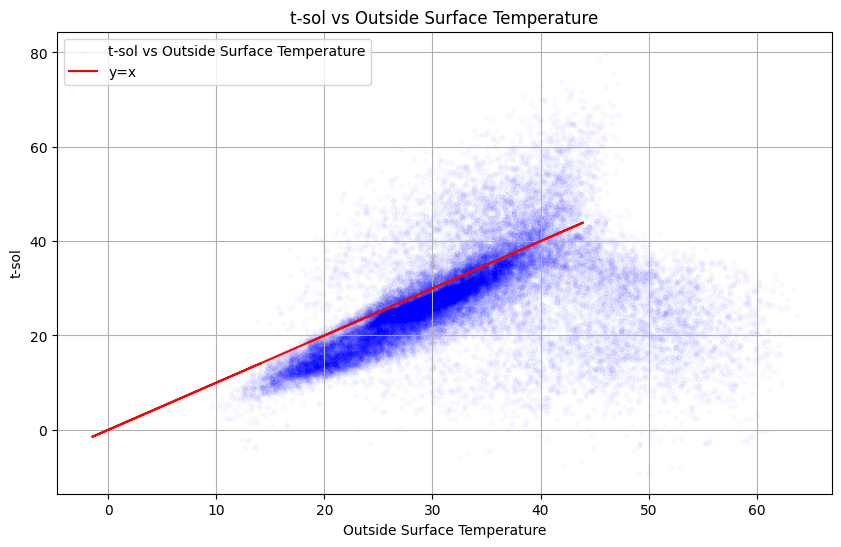

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['[1] Surface Outside Face Temperature  (C)'], data['T-sol'], color='blue', label='t-sol vs Outside Surface Temperature', alpha=0.02, s=10)  # Adjust the size of markers by changing the value of s
plt.plot(data['[1] Site Outdoor Air Drybulb Temperature  (C)'], data['[1] Site Outdoor Air Drybulb Temperature  (C)'], color='red', label='y=x')  # Add the line
plt.title('t-sol vs Outside Surface Temperature')
plt.xlabel('Outside Surface Temperature')
plt.ylabel('t-sol')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
data.columns


Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'hdi', 'day', 'Local Time', 'hra', 'declination',
       'solar_zenith', 'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth',
       'AOI', 'Tsky', 'E_ground', 'Calc_total_E', 'H', 'E/H', 't_longwave',
       'T-sol'],
      dtype='object')

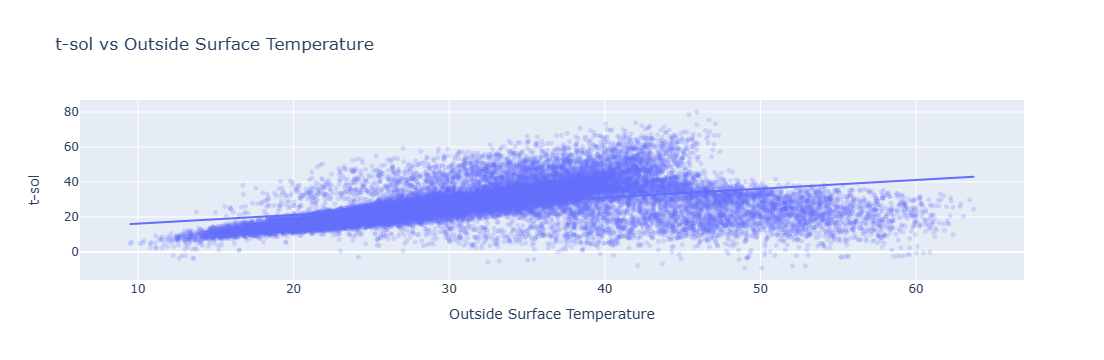

In [33]:
import plotly.express as px

fig = px.scatter(data_frame=data, x='[1] Surface Outside Face Temperature  (C)', y='T-sol', title='t-sol vs Outside Surface Temperature',
                 labels={'T-sol': 't-sol', 'Date/Time': 'Date/Time'},
                 trendline='ols')  # Adding the OLS trendline
fig.update_traces(marker=dict(size=5, opacity=0.2), selector=dict(mode='markers'))  # Adjust marker size and opacity
fig.update_layout(xaxis=dict(title='Outside Surface Temperature'), yaxis=dict(title='t-sol'), legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99))
fig.show()


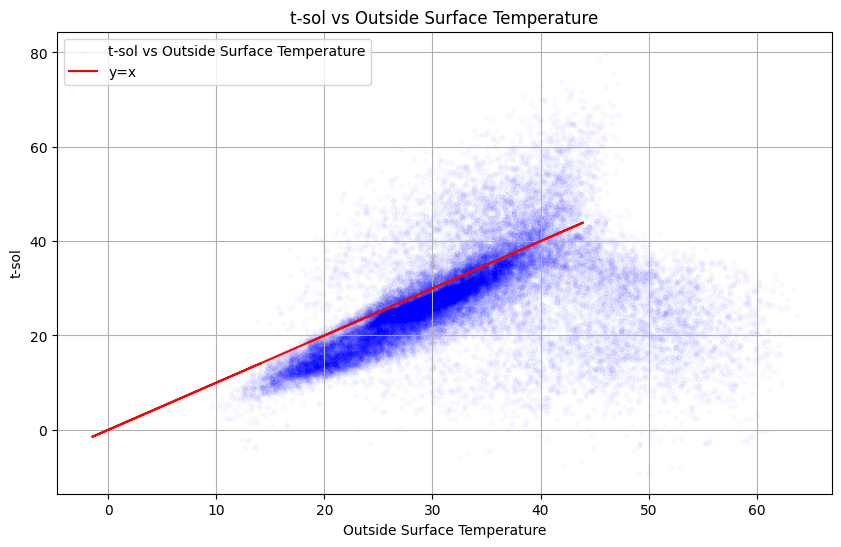

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['[1] Surface Outside Face Temperature  (C)'], data['T-sol'], color='blue', label='t-sol vs Outside Surface Temperature', alpha=0.02, s=10)  # Adjust the size of markers by changing the value of s
plt.plot(data['[1] Site Outdoor Air Drybulb Temperature  (C)'], data['[1] Site Outdoor Air Drybulb Temperature  (C)'], color='red', label='y=x')  # Add the line
plt.title('t-sol vs Outside Surface Temperature')
plt.xlabel('Outside Surface Temperature')
plt.ylabel('t-sol')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# prd=reg.predict(X_train)

In [26]:
# import matplotlib.pyplot as plt

# # Assuming prd and y_train are numpy arrays
# plt.figure(figsize=(10, 6))
# plt.scatter(y_train, prd, color='blue', label='Actual vs Predicted')
# plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
# plt.title('Actual vs Predicted')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.legend()
# plt.grid(True)
# plt.show()


In [27]:
data_bh=data.loc[data['Lats']==23.2420]
data_bh_180=data_bh.loc[data_bh['Orientation']==270]
data_bh_180_summer = data_bh_180[data_bh_180['Date/Time'].dt.month.isin([12])]

In [28]:
# data_bh_180_summer


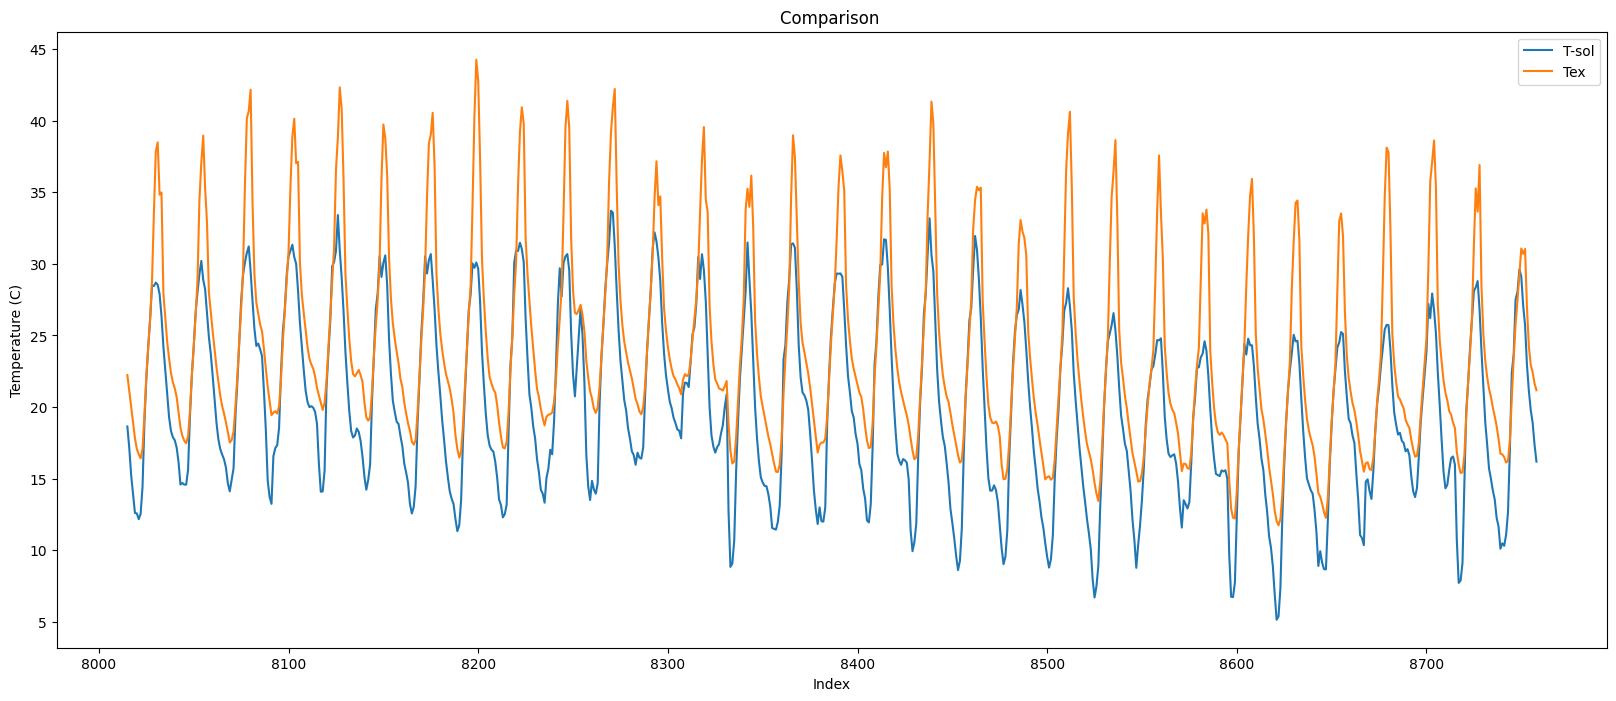

In [29]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_bh_180_summer['T-sol'] # Subset of T_sol_air
t_ex_subset = data_bh_180_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [30]:
data_bh=data.loc[data['Lats']==23.2420]
data_bh_90=data_bh.loc[data_bh['Orientation']==90]
data_bh_90_summer = data_bh_90[data_bh_90['Date/Time'].dt.month.isin([4])]

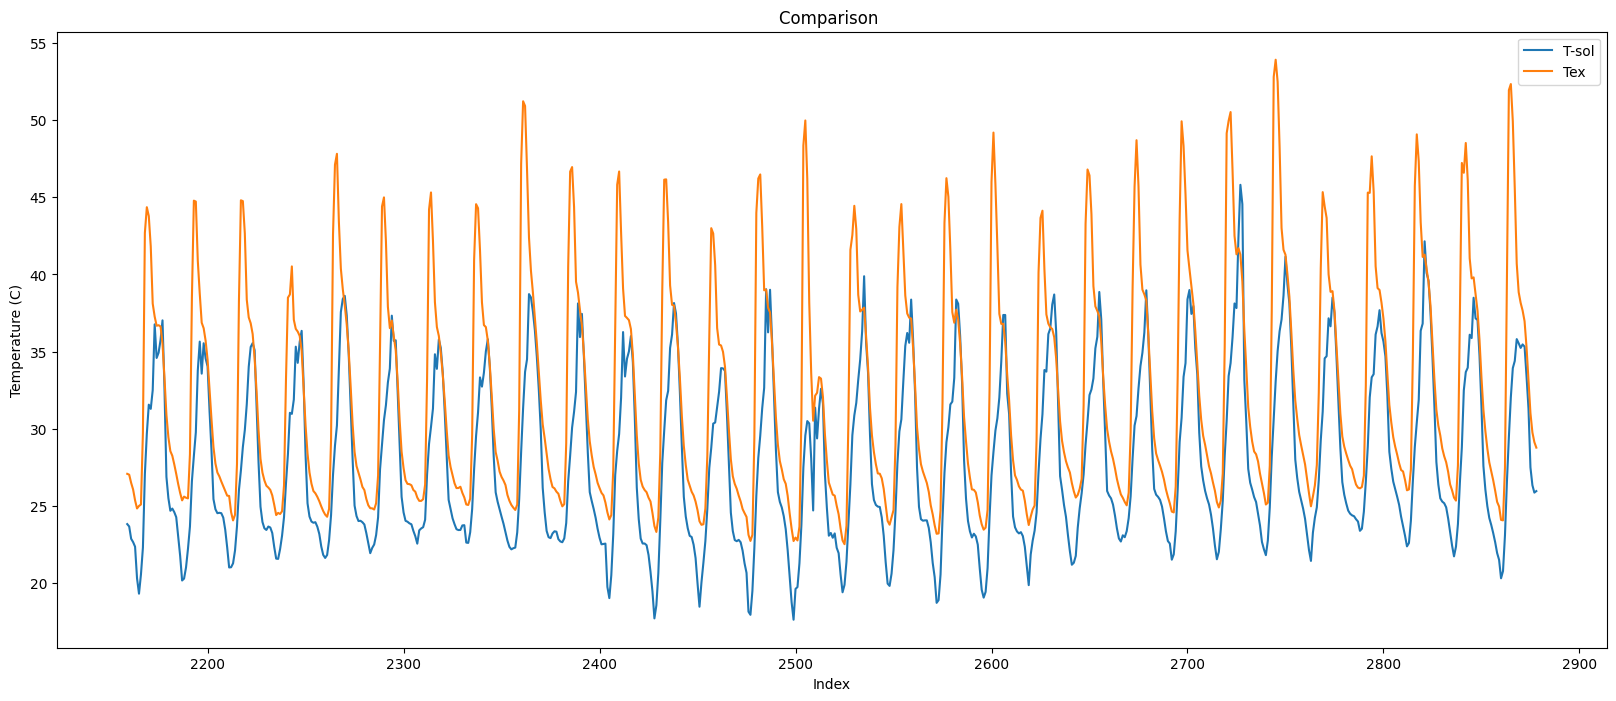

In [31]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_bh_90_summer['T-sol'] # Subset of T_sol_air
t_ex_subset = data_bh_90_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [71]:
# b = 0.9
# data['Tsol_we'] = (b+0.2) * data['T-sol'] + (1 - b) * data['T-sol'].shift(-1)

In [32]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(data['[1] Surface Outside Face Temperature  (C)'], data['Tsol_we'], color='blue', label='t-sol vs Outside Surface Temperature', alpha=0.02, s=10)  # Adjust the size of markers by changing the value of s
# plt.plot(data['[1] Site Outdoor Air Drybulb Temperature  (C)'], data['[1] Site Outdoor Air Drybulb Temperature  (C)'], color='red', label='y=x')  # Add the line
# plt.title('t-sol vs Outside Surface Temperature')
# plt.xlabel('Outside Surface Temperature')
# plt.ylabel('t-sol')
# plt.legend()
# plt.grid(True)
# plt.show()


In [33]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(data['[1] Surface Outside Face Temperature  (C)'], data['T-sol'], color='blue', label='t-sol vs Outside Surface Temperature', alpha=0.02, s=10)  # Adjust the size of markers by changing the value of s
# plt.plot(data['[1] Site Outdoor Air Drybulb Temperature  (C)'], data['[1] Site Outdoor Air Drybulb Temperature  (C)'], color='red', label='y=x')  # Add the line
# plt.title('t-sol vs Outside Surface Temperature')
# plt.xlabel('Outside Surface Temperature')

# plt.ylabel('t-sol')
# plt.legend()
# plt.grid(True)
# plt.show()


In [36]:
X = data.drop(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)','E_ground',
        'Orientation', 'Lats','T-sol',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'hdi', 'day', 'Local Time', 'hra', 'declination',
       'solar_zenith', 'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth',
       'AOI', 'Tsky', 'Calc_total_E', 'H','[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = data['[1] Surface Outside Face Temperature  (C)']

X.columns

Index(['[1] Site Outdoor Air Drybulb Temperature  (C)', 'E/H', 't_longwave'], dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


0.6967264866109414

In [40]:
coefficients = reg.coef_

# Getting the intercept (bias) of the model
intercept = reg.intercept_

# Printing the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Scoring the model on the training set
train_score = reg.score(X_train, y_train)
print("Training Score:", train_score)

Coefficients: [ 1.20087927 -0.23036252  4.34835385]
Intercept: -2.7447119649038214
Training Score: 0.6967264866109414
